In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

## 런타임 - 세션 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

Text(0.5, 1.0, '한글')

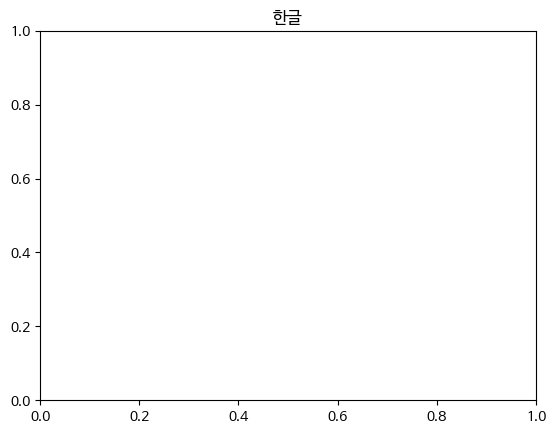

In [ ]:
## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')

In [ ]:
# 파일 불러오기
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_05_등록금-1.xlsx')
df.head()

,기준연도,학교종류,설립구분,지역,상태,학교,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,2023,대학교,사립,경남,기존,가야대학교(김해),6833449.7,6833449.7,5821449.0,7253094.5,0.0,0.0,0.0
1,2023,대학교,사립,경기,기존,가천대학교,8330044.3,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,9890000.0
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,7185831.2,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,9850000.0
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,7397203.7,7397203.7,6646125.0,7839014.7,0.0,0.0,0.0
4,2023,대학교,사립,경기,기존,가톨릭대학교,7071831.5,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2,0.0


In [ ]:
df.columns
#눈에 보이는거랑 다를 수 있기 때문에 무조건 확인

Index(['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '수업료', '등록금', '인문사회', '자연과학',
       '예체능', '공학', '의학'],
      dtype='object')

In [ ]:
# 선별하여 데이터 불러오기(상태에 폐교 제외) : 순서 변경 등
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_05_등록금-1.xlsx')
df = df[df['상태'] == '기존']
df = df[['학교', '설립구분', '지역', '수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학']] #리스트로 필요한 순서 변경
df.head()

,학교,설립구분,지역,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,가야대학교(김해),사립,경남,6833449.7,6833449.7,5821449.0,7253094.5,0.0,0.0,0.0
1,가천대학교,사립,경기,8330044.3,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,9890000.0
2,가톨릭관동대학교,사립,강원,7185831.2,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,9850000.0
3,가톨릭꽃동네대학교,사립,충북,7397203.7,7397203.7,6646125.0,7839014.7,0.0,0.0,0.0
4,가톨릭대학교,사립,경기,7071831.5,7071831.5,6165072.2,7498500.4,8606000.0,8331483.2,0.0


In [ ]:
# 선별하여 데이터 불러오기 : 의학이 0 아닌 데이터만 사용
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/SW_데이터마이닝/DATA/data_05_등록금-1.xlsx')
df = df[df['상태'] == '기존']
df = df[['학교', '설립구분', '지역', '수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학']] #리스트로 필요한 순서 변경
dfm = df[df['의학'] !=0]
dfm.head()

,학교,설립구분,지역,수업료,등록금,인문사회,자연과학,예체능,공학,의학
1,가천대학교,사립,경기,8330044.3,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,9890000.0
2,가톨릭관동대학교,사립,강원,7185831.2,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,9850000.0
5,가톨릭대학교 _제2캠퍼스,사립,서울,9297662.9,9297662.9,0.0,8506363.6,0.0,0.0,10374000.0
10,강원대학교,국립,강원,4102933.2,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5,7102679.4
12,건국대학교,사립,서울,8322289.7,8322289.7,6806309.1,8192611.7,9106330.3,9233646.7,10180000.0


In [ ]:
#df.info()
#df.info
df.dtypes

학교       object
설립구분     object
지역       object
수업료     float64
등록금     float64
인문사회    float64
자연과학    float64
예체능     float64
공학      float64
의학      float64
dtype: object

object 가 3개 인 것을 기억해야 합계 구할 때 편함

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교      243 non-null    object 
 1   설립구분    243 non-null    object 
 2   지역      243 non-null    object 
 3   수업료     243 non-null    float64
 4   등록금     243 non-null    float64
 5   인문사회    243 non-null    float64
 6   자연과학    243 non-null    float64
 7   예체능     243 non-null    float64
 8   공학      243 non-null    float64
 9   의학      243 non-null    float64
dtypes: float64(7), object(3)
memory usage: 20.9+ KB


In [ ]:
dfm.reset_index(inplace=True, drop=True)
dfm

,학교,설립구분,지역,수업료,등록금,인문사회,자연과학,예체능,공학,의학
0,가천대학교,사립,경기,8330044.3,8330044.3,7142012.6,8331022.7,9221255.6,9124110.9,9890000.0
1,가톨릭관동대학교,사립,강원,7185831.2,7185831.2,6441400.5,7505117.7,8216166.7,8126000.0,9850000.0
2,가톨릭대학교 _제2캠퍼스,사립,서울,9297662.9,9297662.9,0.0,8506363.6,0.0,0.0,10374000.0
3,강원대학교,국립,강원,4102933.2,4102933.2,3444132.2,4302703.0,4572575.7,4422149.5,7102679.4
4,건국대학교,사립,서울,8322289.7,8322289.7,6806309.1,8192611.7,9106330.3,9233646.7,10180000.0
5,건양대학교 _제2캠퍼스,사립,대전,7225938.7,7225938.7,5747868.9,7104793.6,0.0,7273326.1,9540000.0
6,경북대학교,국립,대구,4499842.9,4499842.9,3566206.1,4540106.3,4680595.9,4662000.0,8074942.7
7,경상국립대학교,국립,경남,4075878.6,4075878.6,3273315.9,4148147.6,4336406.1,4330000.0,8312888.9
8,경희대학교,사립,서울,7991355.3,7991355.3,6429654.0,8590590.3,8504262.8,8625968.9,11312026.8
9,계명대학교,사립,대구,7279405.2,7279405.2,6023609.5,7920927.5,8571003.2,8275944.9,9850000.0


In [ ]:
df.columns

Index(['학교', '설립구분', '지역', '수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학'], dtype='object')

In [ ]:
dfm.groupby('지역').count()
#dfm을 리셋시켜서 플롯데이터

,학교,설립구분,수업료,등록금,인문사회,자연과학,예체능,공학,의학
지역,,,,,,,,,
강원,6,6,6,6,6,6,6,6,6
경기,2,2,2,2,2,2,2,2,2
경남,2,2,2,2,2,2,2,2,2
경북,4,4,4,4,4,4,4,4,4
광주,2,2,2,2,2,2,2,2,2
대구,2,2,2,2,2,2,2,2,2
대전,4,4,4,4,4,4,4,4,4
부산,4,4,4,4,4,4,4,4,4
서울,10,10,10,10,10,10,10,10,10


In [ ]:
dfm.groupby('지역').count()['학교'] #동일하기때문에 하나만 추출

지역
강원     6
경기     2
경남     2
경북     4
광주     2
대구     2
대전     4
부산     4
서울    10
울산     1
인천     1
전남     1
전북     3
제주     1
충남     2
충북     2
Name: 학교, dtype: int64

In [ ]:
dfm.groupby('지역').count()[['학교']] #표 형식으로, list화

,학교
지역,
강원,6
경기,2
경남,2
경북,4
광주,2
대구,2
대전,4
부산,4
서울,10


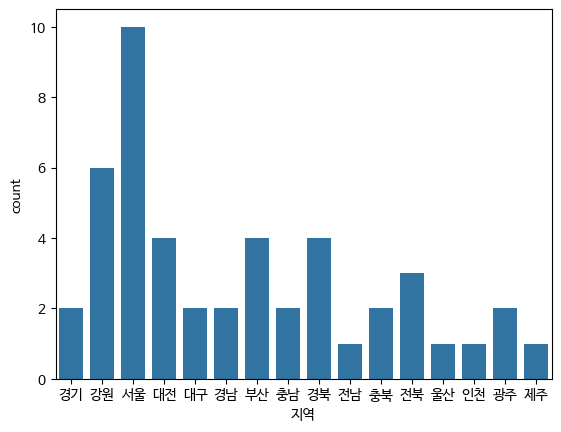

In [ ]:
# 지역별 의대수
import seaborn as sns
sns.countplot(x='지역', data=dfm)
plt.show()

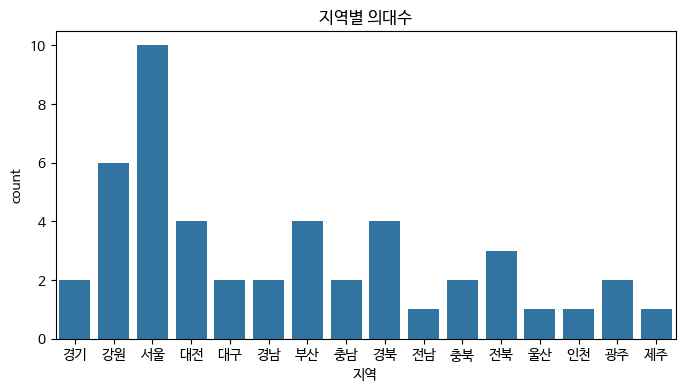

In [ ]:
# 지역별 의대수
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='지역', data=dfm)
plt.title('지역별 의대수')
plt.show()

<ipython-input-16-d03dad7f1156>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='지역', data=dfm, palette='Set2')  # 적절한 색상 팔레트 선택


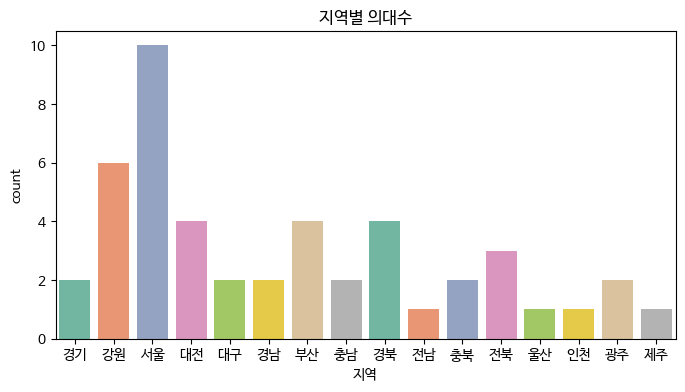

In [ ]:
# 지역별 의대수
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='지역', data=dfm, palette='Set2')  # 적절한 색상 팔레트 선택
plt.title('지역별 의대수')
plt.show()

In [ ]:
# 지역별 의대수 카운트한 결과로 인덱스를 구하기
dfm.value_counts('지역')
#values (x) ! values (o)

지역
서울    10
강원     6
경북     4
대전     4
부산     4
전북     3
경기     2
경남     2
광주     2
대구     2
충남     2
충북     2
울산     1
인천     1
전남     1
제주     1
Name: count, dtype: int64

In [ ]:
dfm.value_counts('지역').index

Index(['서울', '강원', '경북', '대전', '부산', '전북', '경기', '경남', '광주', '대구', '충남', '충북',
       '울산', '인천', '전남', '제주'],
      dtype='object', name='지역')

In [ ]:
# 순서대로 변수에 저장 후
dfm_order = dfm.value_counts('지역').index

<ipython-input-20-2dc906bbe901>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='지역', data=dfm, palette='Set2')


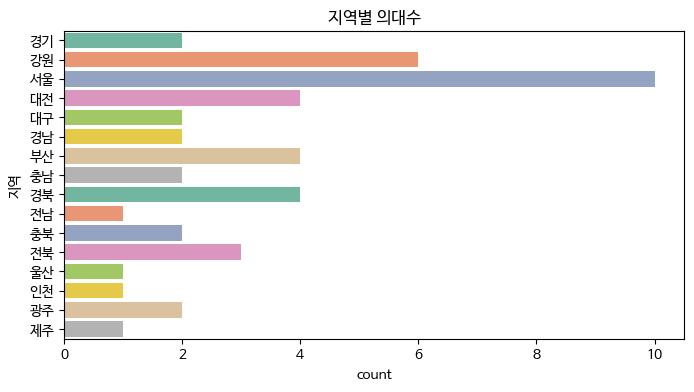

In [ ]:
# order 세로 그래프
plt.figure(figsize=(8,4))
sns.countplot(y='지역', data=dfm, palette='Set2')
plt.title('지역별 의대수')
plt.show()

<ipython-input-21-71b55f230733>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='지역', order=dfm_order, data=dfm, palette='Set2')  # y축으로 변경


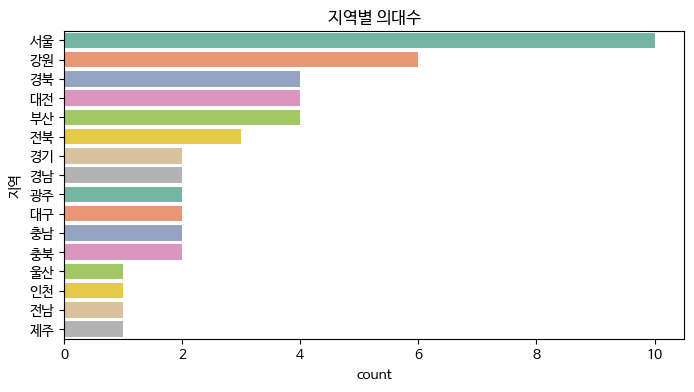

In [ ]:
# order 가로 그래프
plt.figure(figsize=(8,4))
sns.countplot(y='지역', order=dfm_order, data=dfm, palette='Set2')  # y축으로 변경
plt.title('지역별 의대수')
plt.show()

In [ ]:
list(enumerate(dfm['지역'].value_counts())) #list형태로

[(0, 10),
 (1, 6),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

<ipython-input-23-f12095f726bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='지역', order=dfm_order, data=dfm, palette='Set2')  # y축으로 변경


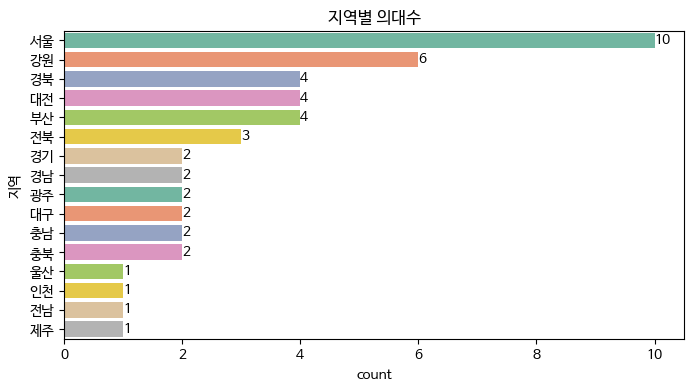

In [ ]:
# order 가로 그래프 : 개수 표
plt.figure(figsize=(8,4))
sns.countplot(y='지역', order=dfm_order, data=dfm, palette='Set2')  # y축으로 변경
plt.title('지역별 의대수')

# text 표시
ax = plt.gca()
for i, cnt in enumerate(dfm['지역'].value_counts()) :
  ax.text(cnt, i, str(cnt), va='center')
plt.show()

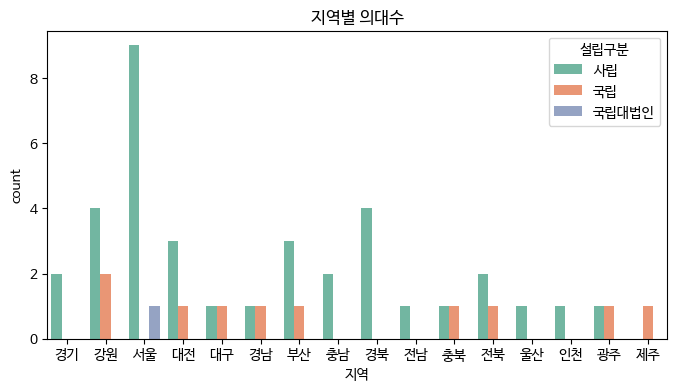

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='지역', hue='설립구분', data=dfm, palette='Set2')
plt.title('지역별 의대수')
plt.show()

#hue !!! 범주형 자료

<ipython-input-25-db887c1bc55a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='지역', y='의학', data=dfm, palette='Set2')


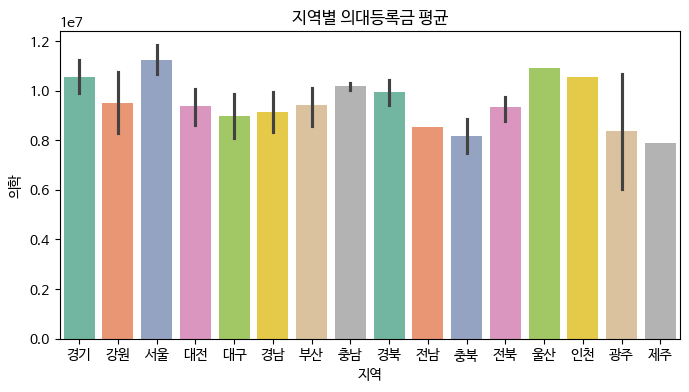

In [ ]:
# barplot : 표준편차 표
plt.figure(figsize=(8,4))
sns.barplot(x='지역', y='의학', data=dfm, palette='Set2')
plt.title('지역별 의대등록금 평균')
plt.show()

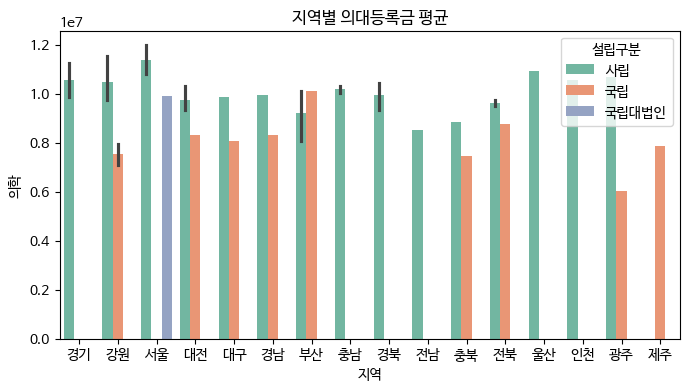

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='지역', y='의학', hue='설립구분', data=dfm, palette='Set2')  # 범주형자료 : hue
plt.title('지역별 의대등록금 평균')
plt.show()

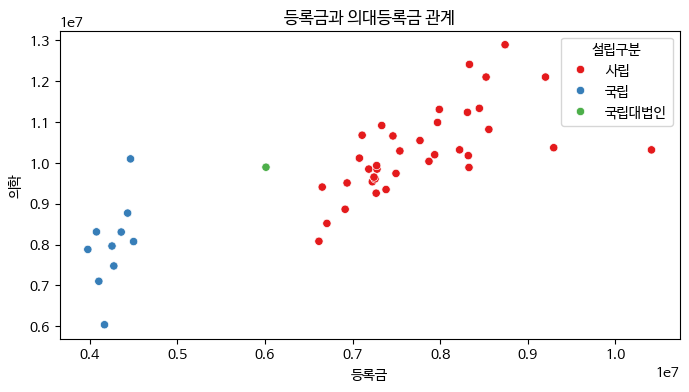

In [ ]:
# scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='등록금', y='의학', hue='설립구분', data=dfm, palette='Set1') # 수치형 데이터만, Set1 으로 수정
plt.title('등록금과 의대등록금 관계')
plt.show()

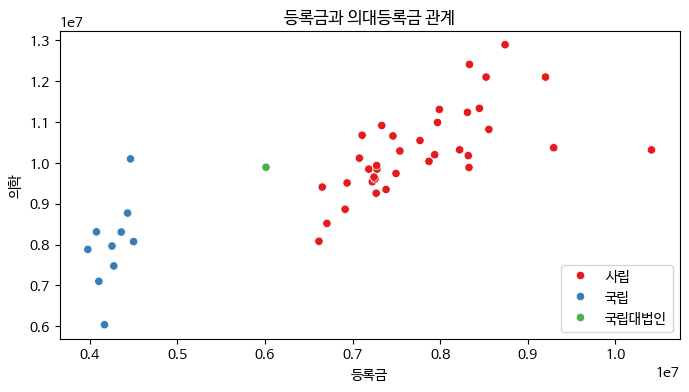

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='등록금', y='의학', hue='설립구분', data=dfm, palette='Set1') # 수치형 데이터만, Set1 으로 수정
plt.title('등록금과 의대등록금 관계')
plt.legend(loc='lower right')
plt.show()

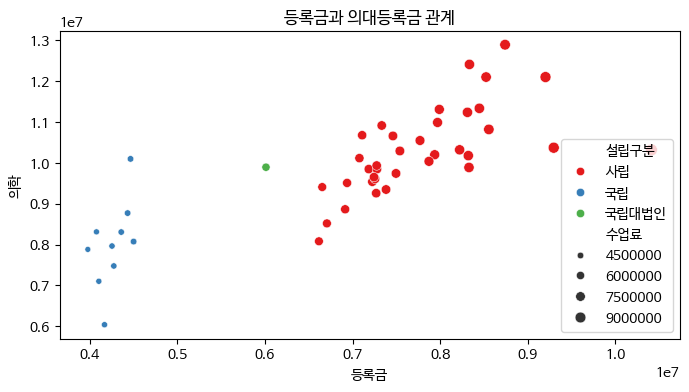

In [ ]:
# 버블차트 :
plt.figure(figsize=(8,4))
sns.scatterplot(x='등록금', y='의학', hue='설립구분',
                size='수업료',
                data=dfm, palette='Set1')
plt.title('등록금과 의대등록금 관계')
plt.legend(loc='lower right')
plt.show()

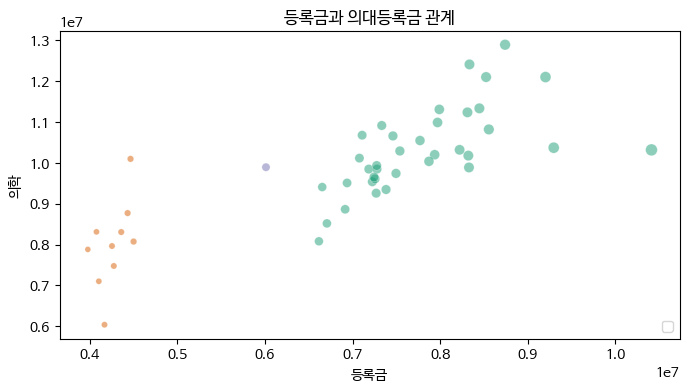

In [ ]:
# 버블차트 :
plt.figure(figsize=(8,4))
sns.scatterplot(x='등록금', y='의학', hue='설립구분',
                size='수업료',
                legend=False,  #범례 삭제
                alpha=0.5, palette='Dark2',  #투명도 조정, 색상 변경
                data=dfm)
plt.title('등록금과 의대등록금 관계')
plt.legend(loc='lower right')
plt.show()

<Figure size 800x400 with 0 Axes>

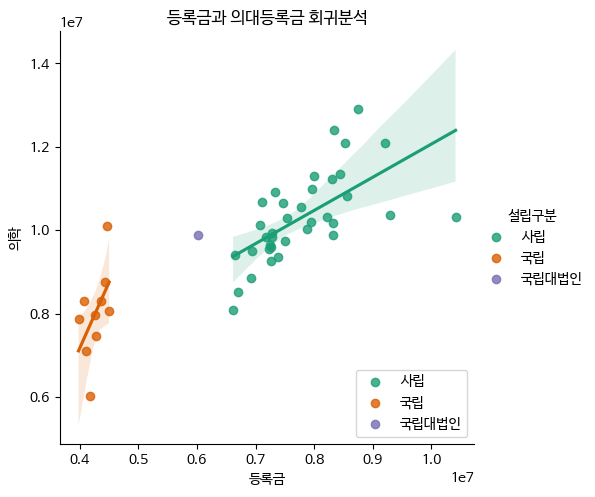

In [ ]:
# 선형회귀 : 그룹별
plt.figure(figsize=(8,4))
sns.lmplot(x='등록금', y='의학',
            fit_reg=True,
                hue='설립구분',
                palette='Dark2',
                data=dfm)
plt.title('등록금과 의대등록금 회귀분석')
plt.legend(loc='lower right')
plt.show()

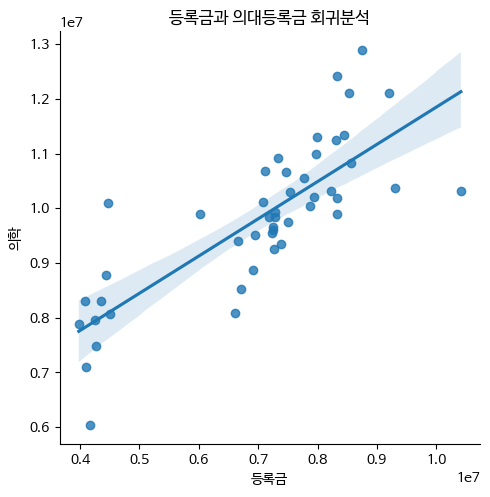

In [ ]:
# 선형회귀 : 전체
#plt.figure(figsize=(8,4)) 불필요
sns.lmplot(x='등록금', y='의학',
           fit_reg=True,
                palette='Dark2',
                data=dfm)
plt.title('등록금과 의대등록금 회귀분석')
plt.show()

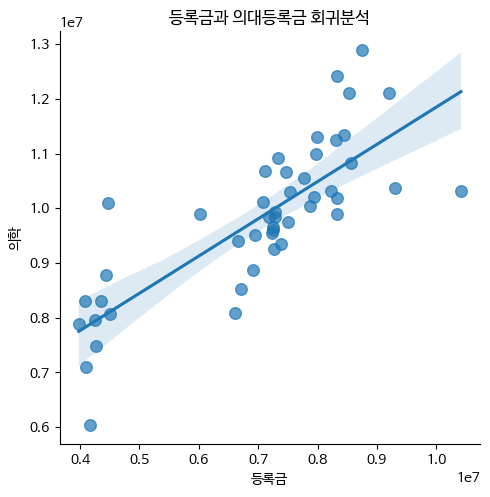

In [ ]:
# 선형회귀 : 전체
sns.lmplot(x='등록금', y='의학',
           fit_reg=True,
           scatter_kws={'s':70, 'alpha':0.7},
           data=dfm)
plt.title('등록금과 의대등록금 회귀분석')
plt.show()

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교      47 non-null     object 
 1   설립구분    47 non-null     object 
 2   지역      47 non-null     object 
 3   수업료     47 non-null     float64
 4   등록금     47 non-null     float64
 5   인문사회    47 non-null     float64
 6   자연과학    47 non-null     float64
 7   예체능     47 non-null     float64
 8   공학      47 non-null     float64
 9   의학      47 non-null     float64
dtypes: float64(7), object(3)
memory usage: 3.8+ KB


In [ ]:
# 수치형 중, 일부값만 추출
#인덱스 확인하려고 dfm.info()한거임
#모든 행에 대해서, 등록금 인문사회 의학만 비교 (iloc)
dfm.iloc[:, [4,5,9]]

,등록금,인문사회,의학
0,8330044.3,7142012.6,9890000.0
1,7185831.2,6441400.5,9850000.0
2,9297662.9,0.0,10374000.0
3,4102933.2,3444132.2,7102679.4
4,8322289.7,6806309.1,10180000.0
5,7225938.7,5747868.9,9540000.0
6,4499842.9,3566206.1,8074942.7
7,4075878.6,3273315.9,8312888.9
8,7991355.3,6429654.0,11312026.8
9,7279405.2,6023609.5,9850000.0


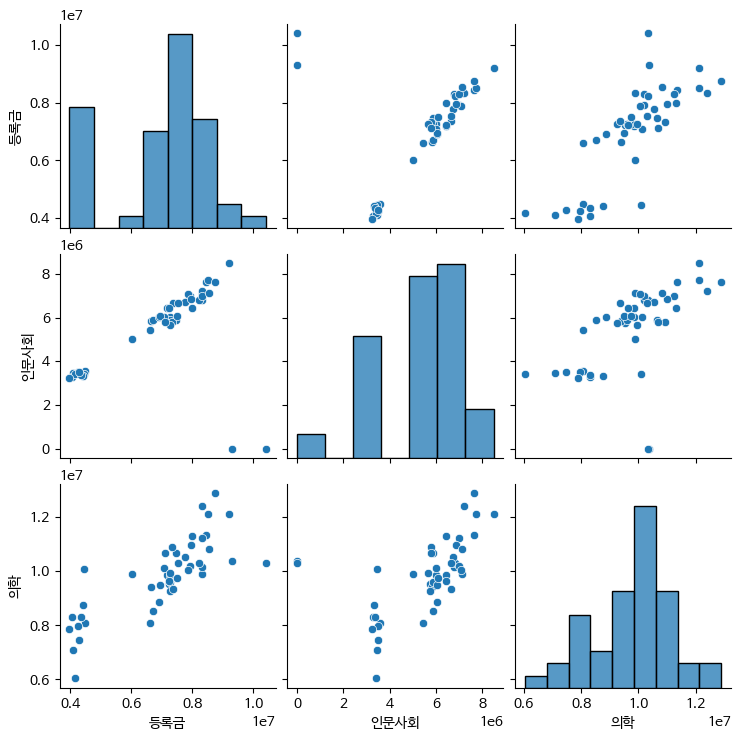

In [ ]:
# 전체 등록금 데이터 불러오기
sns.pairplot(data=dfm.iloc[:, [4,5,9]]) # 모든행에 대해서, 등록금 인문사회 의학 만 비교(iloc 위치값 설정)
plt.show()

KeyError: '설립구분'

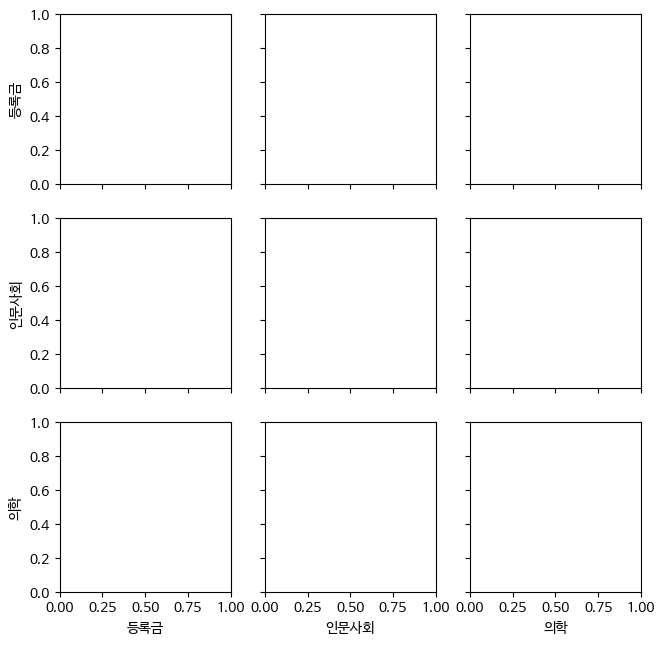

In [ ]:
# Quiz : hue='설립구분' 추가해서 그래프 그리기
sns.pairplot(hue='설립구분', data=dfm.iloc[:, [4,5,9]])
plt.show()

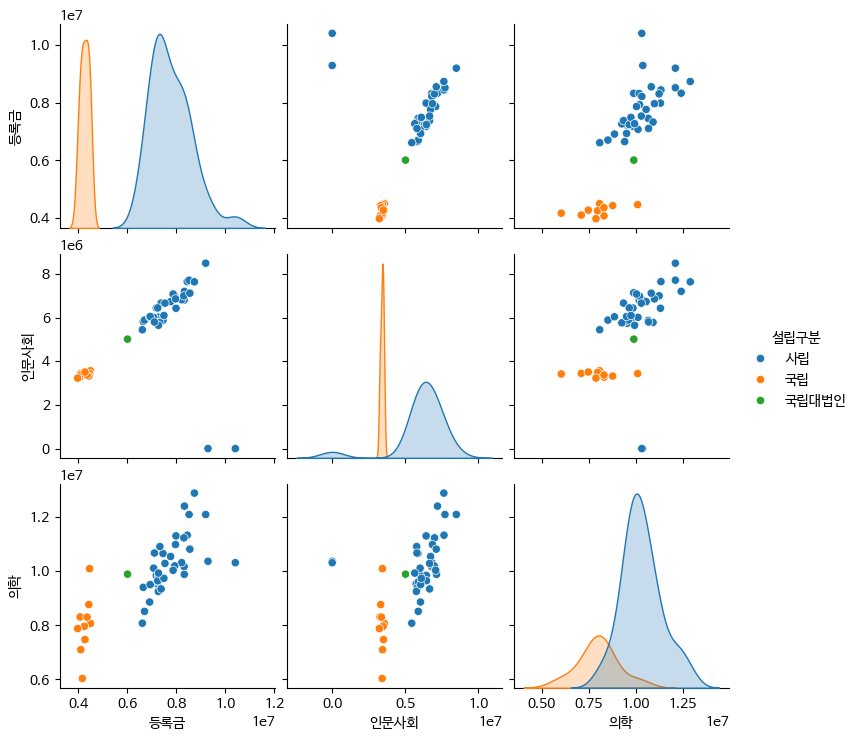

In [ ]:
# 정답
sns.pairplot(hue='설립구분', data=dfm.iloc[:, [1,4,5,9]])
plt.show()

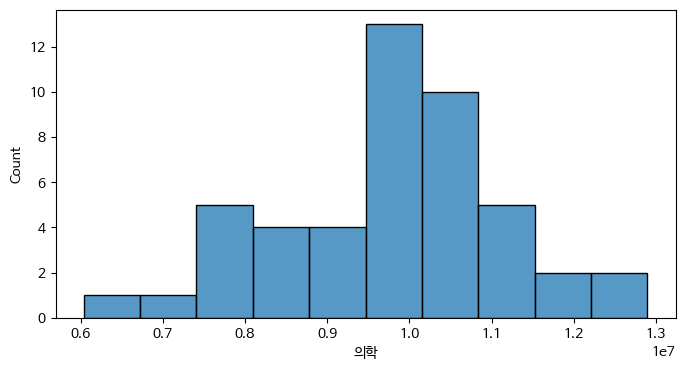

In [ ]:
# histplot : 막대(계급) 개수 지정
plt.figure(figsize=(8,4))
sns.histplot(x='의학', bins=10, data=dfm)
plt.show()

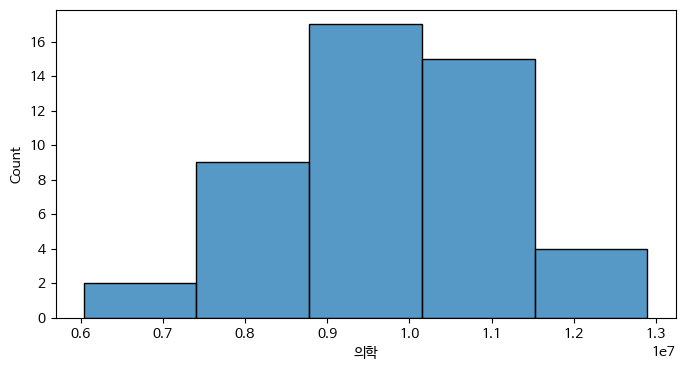

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x='의학', bins=5, data=dfm)
plt.show()

<ipython-input-41-6b78085f2244>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfm['의학'], bins=10, kde=True) #시리즈로 표시, kde값 설정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


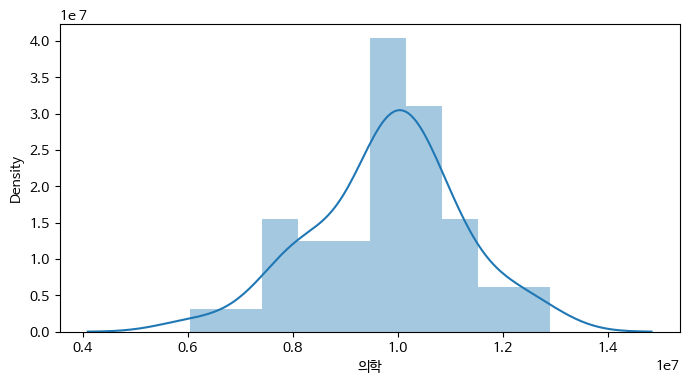

In [ ]:
# distplot : 히스토그램과 커널 밀도 추정(KDE) 결합하여 연속형 변수의 분포를 시각화,
# 중심 경향성과 분산을 파악 가능
# 모델링을 위한 기초작업

plt.figure(figsize=(8,4))
sns.distplot(dfm['의학'], bins=10, kde=True) #시리즈로 표시, kde값 설정
plt.show()

In [ ]:
# 경고 메시지 무시 라이브러리
import warnings
warnings.filterwarnings('ignore')

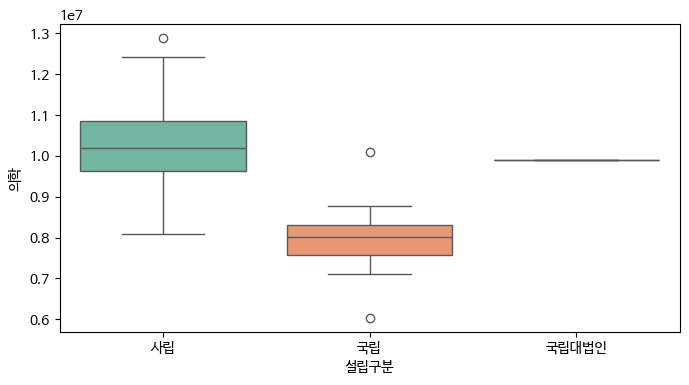

In [ ]:
# boxplot : 이상치 확인
plt.figure(figsize=(8,4))
sns.boxplot(x='설립구분', y='의학', data=dfm, palette='Set2')
plt.show()

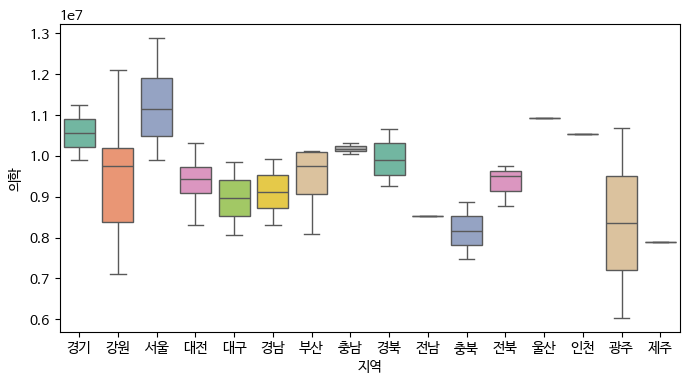

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='지역', y='의학', data=dfm, palette='Set2')
plt.show()

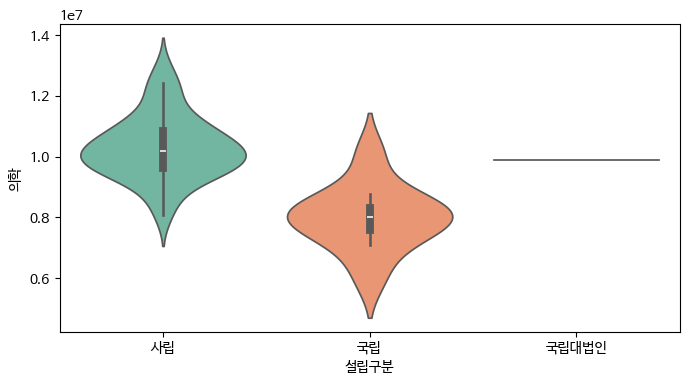

In [ ]:
# violinplot
plt.figure(figsize=(8,4))
sns.violinplot(x='설립구분', y='의학', data=dfm, palette='Set2')
plt.show()

In [ ]:
# 상관관계
dfm.corr()

ValueError: could not convert string to float: '가천대학교'

In [ ]:
#df.columns 로 확인 후, 뺄 것(수치데이터가 아닌 것들)을 정해서 dfc 정의
df.columns
dfc = df[['수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학']]
dfc

Index(['학교', '설립구분', '지역', '수업료', '등록금', '인문사회', '자연과학', '예체능', '공학', '의학'], dtype='object')

In [ ]:
# 상관관계
# 상관관계를 파악하기 위해서는 메소드 .corr()

dfc.corr()

,수업료,등록금,인문사회,자연과학,예체능,공학,의학
수업료,1.000000,1.000000,0.675719,0.600690,0.606247,0.560788,0.201849
등록금,1.000000,1.000000,0.675719,0.600690,0.606247,0.560788,0.201849
인문사회,0.675719,0.675719,1.000000,0.504543,0.486016,0.511258,0.146084
자연과학,0.600690,0.600690,0.504543,1.000000,0.490010,0.601802,0.326305
예체능,0.606247,0.606247,0.486016,0.490010,1.000000,0.480763,0.204157
공학,0.560788,0.560788,0.511258,0.601802,0.480763,1.000000,0.297123
의학,0.201849,0.201849,0.146084,0.326305,0.204157,0.297123,1.000000


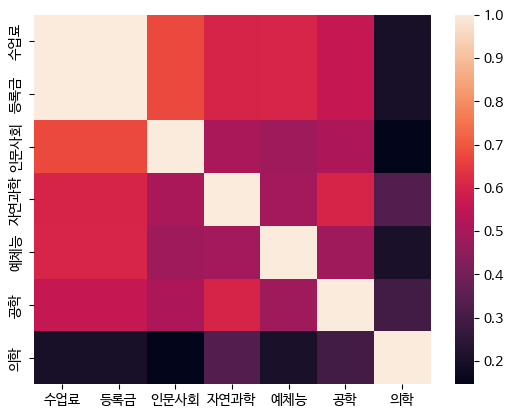

In [ ]:
# heatmap

sns.heatmap(dfc.corr())
plt.show()

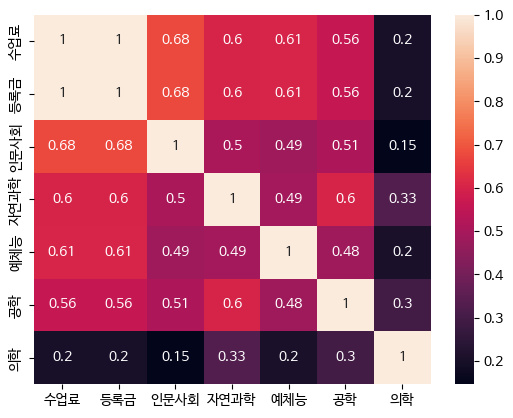

In [ ]:
# 수치값 표시
sns.heatmap(dfc.corr(), annot=True)
plt.show()

In [ ]:
# treemap
#import matplotlib.pyplot as plt
import plotly.express as px
fig = px.treemap(dfm, path=['설립구분', '학교', '등록금'], values='등록금')
fig.show()

In [ ]:
# Plotly 주요 특징 중 Hover 레이블 기능 : 동일 축의 위 그래프 정보 생성
fig = px.scatter(dfm, x='등록금', y='의학',
                 size='인문사회',   #크기
                 color='설립구분',  #색상
                 symbol='설립구분') #마커
# Hover 설정 x축으로 바꾸기 : 커서와 동일 축의 위치 그래프 정보 생성
fig.update_layout(hovermode='x unified')

# 수평선/수직선 생성 : 마우스 커서를 따라 해당 위치에 대한 정보 파악
fig.update_xaxes(showspikes=True, spikecolor='green', spikesnap='cursor', spikemode='across')
fig.update_yaxes(showspikes=True, spikecolor='orange', spikethickness=2)
fig.show()

In [ ]:
# 그래프 그리기
fig = px.scatter(dfm, x='등록금', y='의학',
                 color='설립구분',
                 facet_col='설립구분')
fig.show()

In [ ]:
# 박스플롯과 함께 데이터 위치를 marker를 통해 표시
fig = px.box(dfm, x='설립구분', y='의학',
             color='설립구분',
             points='all')
fig.show()